# **Caso Práctico: Planificación de la Fuerza Laboral mediante Series de Tiempo**


### **Introducción al Problema**

#### **Definición del Problema**

La planificación del personal es un aspecto crucial para cualquier organización. Contar con el número adecuado de empleados en cada área en el momento necesario permite mantener la continuidad operativa, cumplir con las demandas del mercado y garantizar la eficiencia organizacional. Sin embargo, prever las necesidades futuras de personal puede ser un desafío debido a factores como la estacionalidad, la rotación de empleados y los cambios en las operaciones.

En este proyecto, abordaremos el problema de predecir las necesidades futuras de personal en una organización utilizando datos históricos. Este análisis permitirá anticipar demandas y diseñar estrategias proactivas para la contratación, capacitación y redistribución de recursos humanos.


#### **Descripción del Dataset**

El dataset utilizado para este análisis incluye datos históricos de las necesidades de personal en una organización, junto con variables relevantes que afectan dichas necesidades. A continuación, se describen las columnas principales:

1. **Fecha**: Mes y año del registro, representando la dimensión temporal del dataset.
2. **Área**: Departamento o área de la organización (por ejemplo, IT, Finanzas, Recursos Humanos, etc.).
3. **Necesidad_Personal**: Número de empleados requeridos en ese mes para cada área.
4. **Proyectos_Activos**: Número de proyectos en curso durante el mes, un indicador de la carga de trabajo.
5. **Rotacion_Empleados**: Porcentaje de empleados que dejaron la organización durante ese mes.
6. **Ausentismo**: Porcentaje de ausentismo registrado en el mes.
7. **Horas_Extras**: Horas extras promedio trabajadas durante el mes.
8. **Clima_Laboral**: Índice de clima laboral, evaluado en una escala de 1 a 10.

Este dataset proporciona una base rica para explorar patrones temporales, identificar tendencias y desarrollar un modelo predictivo de series de tiempo que sea relevante para la planificación de personal.


#### **Objetivo del Análisis**

El objetivo principal de este análisis es construir un modelo de series de tiempo capaz de predecir las necesidades futuras de personal en función de datos históricos. Para lograr esto, abordaremos los siguientes objetivos específicos:

1. **Identificar patrones históricos**: Detectar tendencias y estacionalidades en las necesidades de personal.
2. **Desarrollar un modelo predictivo**: Utilizar técnicas de series de tiempo para proyectar las necesidades futuras.
3. **Proporcionar recomendaciones**: Ofrecer información accionable basada en las predicciones, que apoye la toma de decisiones en la planificación de recursos humanos.

Este análisis no solo ayudará a anticipar demandas, sino que también permitirá a la organización optimizar sus recursos y mejorar la eficiencia operativa. La integración de estos hallazgos en los procesos de planificación estratégica puede marcar una diferencia significativa en la competitividad de la organización.


### **Exploración y Preprocesamiento del Dataset**

#### **Carga de Datos**

En esta sección, cargaremos el dataset generado para realizar el análisis. Esto incluye verificar su estructura y observar un resumen inicial de la información contenida.


In [ ]:
#Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#Cargar el dataset
data = pd.read_csv("dataset_necesidades_personal.csv")

# Visualización inicial del dataset
print("Primeras filas del dataset:")
data.head()

Primeras filas del dataset:


,Fecha,Área,Necesidad_Personal,Proyectos_Activos,Rotacion_Empleados,Ausentismo,Horas_Extras,Clima_Laboral
0,2019-01-01,Operaciones,26,6,9.98,3.01,1.19,7.5
1,2018-04-01,Marketing,35,6,0.92,2.10,8.12,7.3
2,2023-12-01,Recursos Humanos,27,14,6.59,12.72,4.07,6.1
3,2021-04-01,Marketing,27,10,4.65,1.66,4.75,5.0
4,2022-10-01,IT,34,5,0.01,3.34,8.36,5.3


In [ ]:
print("\nInformación del dataset:")
data.info()


Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Fecha               5000 non-null   object 
 1   Área                5000 non-null   object 
 2   Necesidad_Personal  5000 non-null   int64  
 3   Proyectos_Activos   5000 non-null   int64  
 4   Rotacion_Empleados  5000 non-null   float64
 5   Ausentismo          5000 non-null   float64
 6   Horas_Extras        5000 non-null   float64
 7   Clima_Laboral       5000 non-null   float64
dtypes: float64(4), int64(2), object(2)
memory usage: 312.6+ KB


In [ ]:
print("\nEstadísticas descriptivas:")
data.describe()


Estadísticas descriptivas:


,Necesidad_Personal,Proyectos_Activos,Rotacion_Empleados,Ausentismo,Horas_Extras,Clima_Laboral
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,25.448400,7.481200,4.988732,7.538478,5.109216,6.991120
std,7.791269,3.998305,2.904436,4.315065,2.890726,1.757151
min,3.000000,1.000000,0.000000,0.000000,0.000000,4.000000
25%,20.000000,4.000000,2.410000,3.810000,2.650000,5.500000
50%,25.000000,8.000000,5.030000,7.575000,5.130000,7.000000
75%,31.000000,11.000000,7.550000,11.320000,7.630000,8.500000
max,51.000000,14.000000,10.000000,15.000000,10.000000,10.000000


#### **Exploración Inicial**

Antes de proceder con el análisis, debemos identificar valores nulos y duplicados para garantizar la calidad de los datos.


In [ ]:
# Verificar valores nulos
print("\nValores nulos por columna:")
print(data.isnull().sum())


Valores nulos por columna:
Fecha                 0
Área                  0
Necesidad_Personal    0
Proyectos_Activos     0
Rotacion_Empleados    0
Ausentismo            0
Horas_Extras          0
Clima_Laboral         0
dtype: int64


In [ ]:
# Verificar duplicados
duplicates = data.duplicated().sum()
print(f"Número de filas duplicadas: {duplicates}")
if duplicates > 0:
    data = data.drop_duplicates()
    print("Duplicados eliminados.")

Número de filas duplicadas: 0


#### **Visualización Exploratoria**

La visualización inicial nos ayudará a detectar patrones de estacionalidad y tendencias en los datos. Utilizaremos gráficos de líneas para observar cómo varían las necesidades de personal en el tiempo, tanto a nivel general como por área.


In [ ]:
# Convertir la columna Fecha a formato datetime
data['Fecha'] = pd.to_datetime(data['Fecha'])

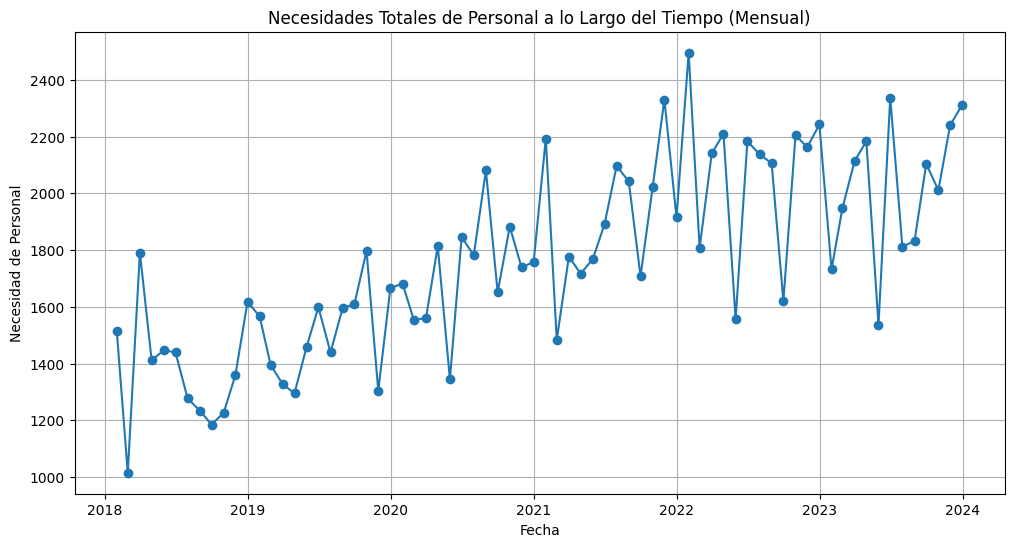

In [ ]:
# Visualización de necesidades totales de personal a lo largo del tiempo
data_total = data.groupby('Fecha')['Necesidad_Personal'].sum()
plt.figure(figsize=(12, 6))
data_monthly = data_total.resample('ME').sum()
plt.plot(data_monthly, marker="o")
plt.title("Necesidades Totales de Personal a lo Largo del Tiempo (Mensual)")
plt.xlabel("Fecha")
plt.ylabel("Necesidad de Personal")
plt.grid(True)
plt.show()

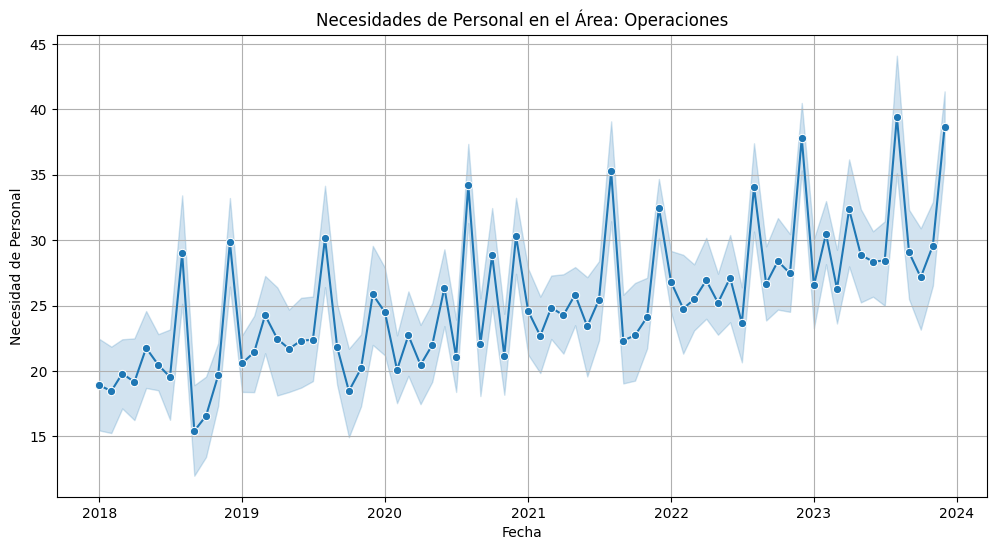

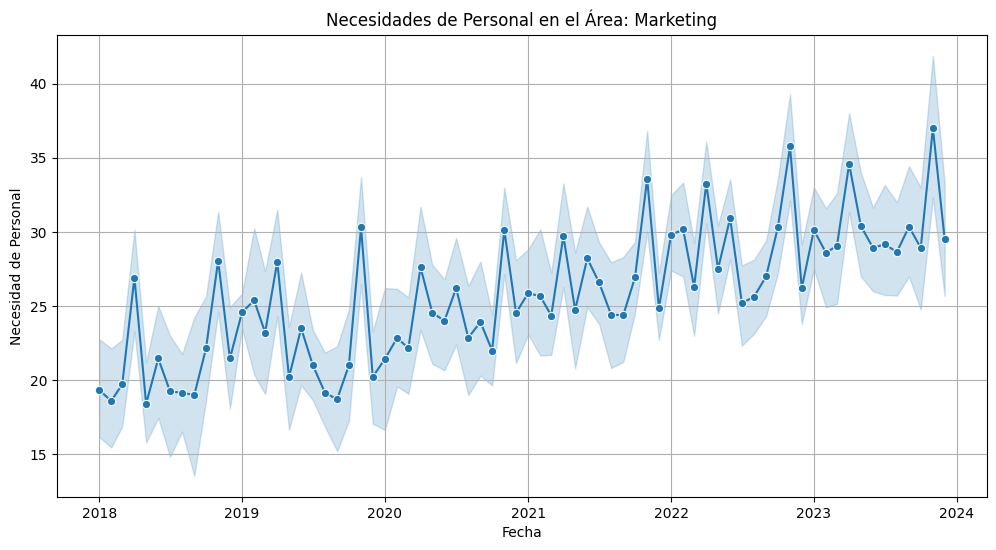

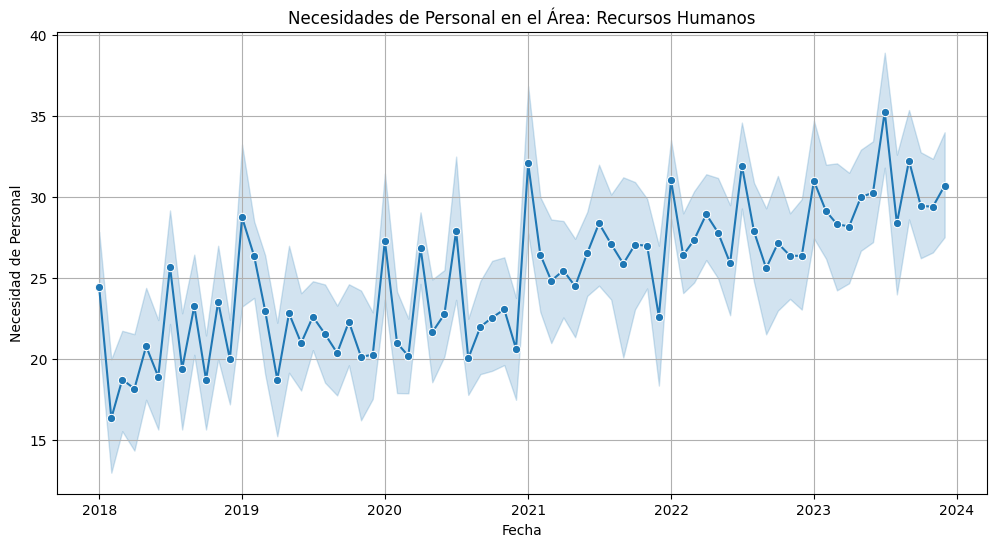

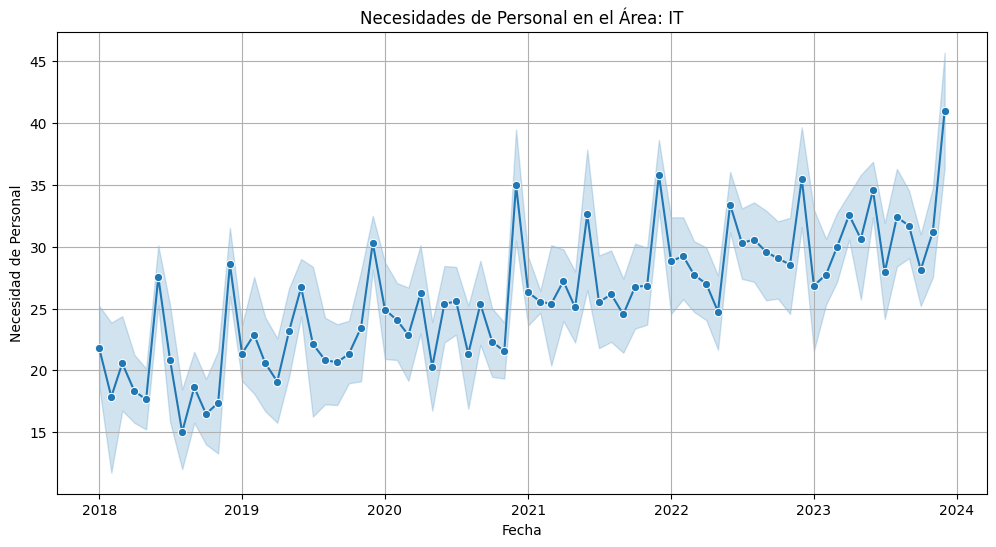

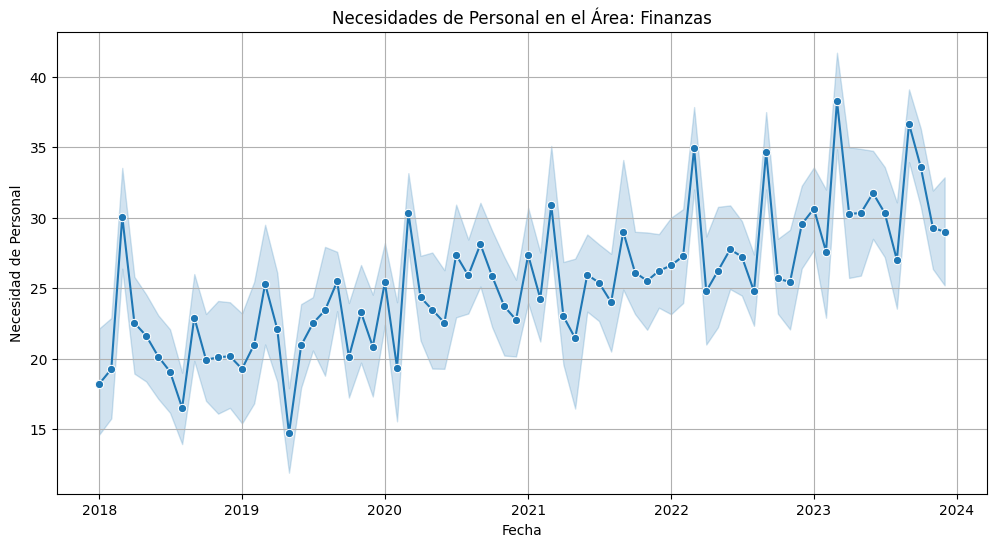

In [ ]:
areas = data['Área'].unique()
for area in areas:
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=data[data['Área'] == area], x='Fecha', y='Necesidad_Personal', marker="o")
    plt.title(f"Necesidades de Personal en el Área: {area}")
    plt.xlabel("Fecha")
    plt.ylabel("Necesidad de Personal")
    plt.grid(True)
    plt.show()

#### **Transformaciones de datos**

Para facilitar el análisis y la modelización, crearemos nuevas columnas derivadas de la variable `Fecha`.

Estas transformaciones nos permitirán realizar análisis más específicos y aprovechar la granularidad temporal de los datos. Por ejemplo, el análisis por trimestre puede revelar patrones estacionales más claros que el análisis mensual.


In [ ]:
# Crear columnas adicionales basadas en la fecha
data['Anio'] = data['Fecha'].dt.year
data['Mes'] = data['Fecha'].dt.month
data['Trimestre'] = data['Fecha'].dt.quarter

print("Vista con las nuevas columnas")
data.head()

Vista con las nuevas columnas


,Fecha,Área,Necesidad_Personal,Proyectos_Activos,Rotacion_Empleados,Ausentismo,Horas_Extras,Clima_Laboral,Anio,Mes,Trimestre
0,2019-01-01,Operaciones,26,6,9.98,3.01,1.19,7.5,2019,1,1
1,2018-04-01,Marketing,35,6,0.92,2.10,8.12,7.3,2018,4,2
2,2023-12-01,Recursos Humanos,27,14,6.59,12.72,4.07,6.1,2023,12,4
3,2021-04-01,Marketing,27,10,4.65,1.66,4.75,5.0,2021,4,2
4,2022-10-01,IT,34,5,0.01,3.34,8.36,5.3,2022,10,4


### **Análisis de Series de Tiempo**

#### **Descomposición de Series de Tiempo**

La descomposición de series de tiempo es una técnica que nos permite dividir una serie temporal en tres componentes principales:

1. **Tendencia**: Representa el comportamiento a largo plazo de los datos.
2. **Estacionalidad**: Captura patrones repetitivos que ocurren en intervalos regulares (por ejemplo, picos en ciertos meses).
3. **Residuales**: Representan las variaciones que no se explican por la tendencia ni la estacionalidad (también conocidas como ruido).


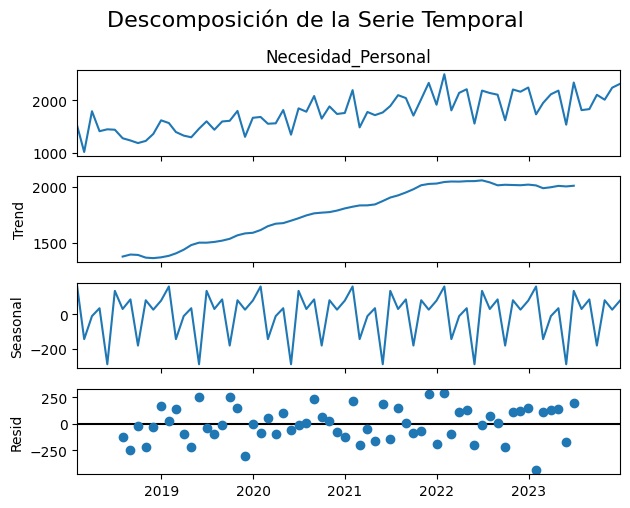

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Descomponer la serie temporal de necesidades totales de personal
serie_temporal = data.set_index('Fecha')['Necesidad_Personal'].resample('ME').sum()
descomposicion = seasonal_decompose(serie_temporal, model='additive', period=12)
descomposicion.plot()
plt.suptitle("Descomposición de la Serie Temporal", fontsize=16, y=1.05)
plt.show()

#### **Estadísticas Clave: Análisis de ACF y PACF**

El análisis de autocorrelación (ACF) y autocorrelación parcial (PACF) es fundamental en las series de tiempo:

- **ACF (Autocorrelation Function)**: Mide la correlación de la serie con sus propios rezagos (lags).
- **PACF (Partial Autocorrelation Function)**: Mide la correlación de la serie con un rezago específico, eliminando la influencia de los rezagos intermedios.

Estos gráficos nos ayudan a identificar patrones temporales y a determinar los parámetros para modelos como ARIMA, además, estas herramientas nos permiten identificar si existen patrones significativos que el modelo puede capturar y cómo seleccionar los rezagos óptimos para el modelado.


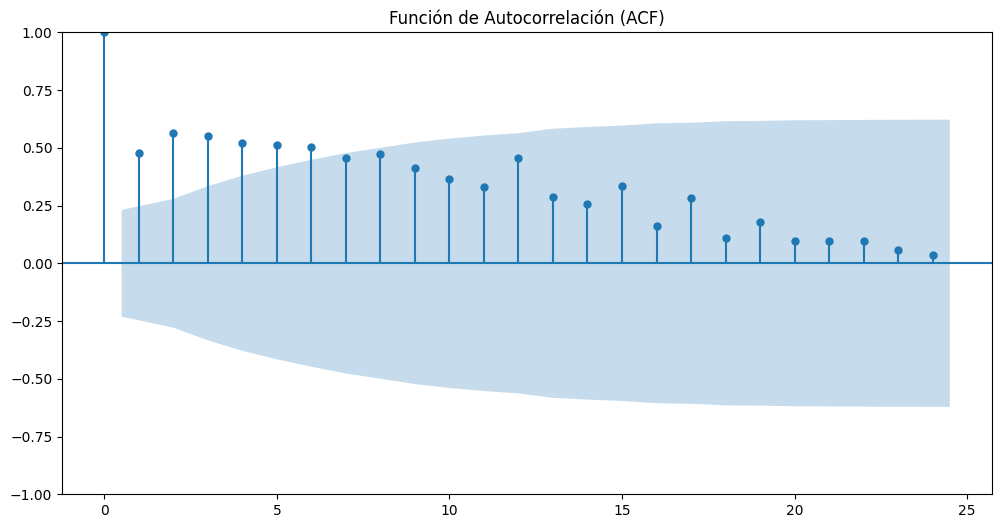

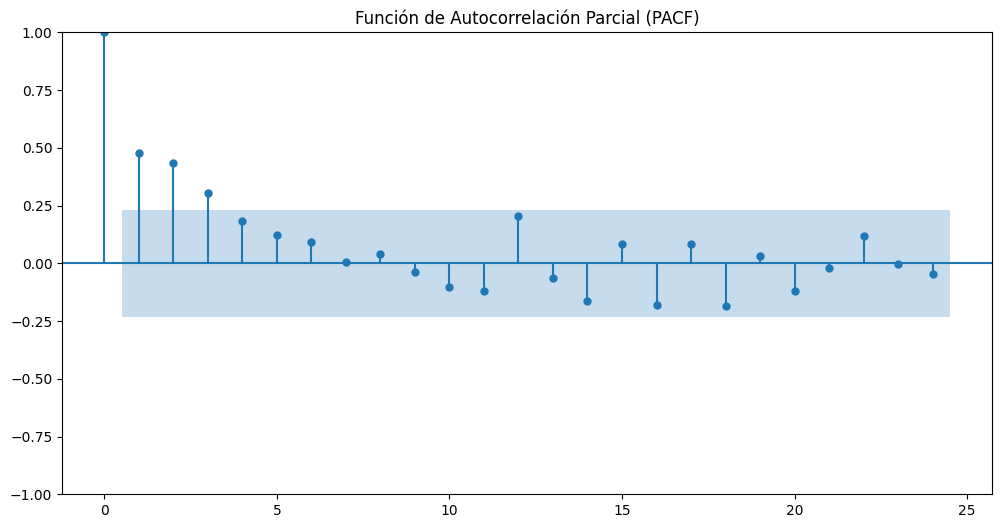

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Visualizar ACF
plt.figure(figsize=(12, 6))
plot_acf(serie_temporal, lags=24, ax=plt.gca())
plt.title("Función de Autocorrelación (ACF)")
plt.show()

# Visualizar PACF
plt.figure(figsize=(12, 6))
plot_pacf(serie_temporal, lags=24, ax=plt.gca())
plt.title("Función de Autocorrelación Parcial (PACF)")
plt.show()

#### **Preparación del Dataset para el Modelado**

##### **División de Datos**

Este código divide una serie temporal en dos conjuntos de datos: entrenamiento y prueba.

- **`train_data = serie_temporal[:-12]`**: Crea el conjunto de entrenamiento con todas las observaciones, excepto las últimas 12.
- **`test_data = serie_temporal[-12:]`**: Crea el conjunto de prueba con las últimas 12 observaciones de la serie temporal.


In [ ]:
train_data = serie_temporal[:-12]
test_data = serie_temporal[-12:]

print(f"Conjunto de entrenamiento: {len(train_data)} observaciones")
print(f"Conjunto de prueba: {len(test_data)} observaciones")

Conjunto de entrenamiento: 60 observaciones
Conjunto de prueba: 12 observaciones


### **Selección e Implementación de Modelos**

#### **Modelo 1: Promedio Móvil Simple (SMA)**

El **Promedio Móvil Simple (SMA)** es una técnica utilizada en análisis de series temporales para suavizar los datos y eliminar el ruido. Se calcula como la media aritmética de un número fijo de puntos de datos en una ventana deslizante. Es una herramienta comúnmente utilizada para identificar tendencias y patrones en los datos.

### Fórmula del Promedio Móvil Simple (SMA)

Para calcular el **Promedio Móvil Simple** en una serie temporal, usamos la siguiente fórmula:

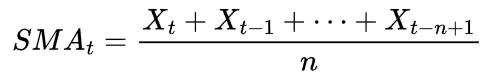

Donde:
- **\(SMA_t\)** es el promedio móvil en el tiempo **t**.
- **X_t, X_t-1,...., X_t-n+1** son los valores de la serie temporal en la ventana de tamaño **n**.
- **\(n\)** es el número de períodos en la ventana (en este caso, 3).

### Explicación del Código

El código realiza el cálculo del **Promedio Móvil Simple (SMA)** sobre un conjunto de datos de entrenamiento. Aquí está el desglose:

- **`sma_window = 3`**: Establece el tamaño de la ventana del promedio móvil, que es **3** en este caso. Esto significa que para cada punto de la serie temporal, se calculará el promedio de los 3 puntos anteriores.
  
- **`sma_forecast = train_data.rolling(window=sma_window).mean()[-12:]`**:
    - La función `rolling(window=sma_window)` crea una "ventana deslizante" de tamaño 3 sobre el conjunto de datos `train_data`. Esta ventana se mueve un paso a la vez sobre los datos, y para cada paso, se calcula el promedio de los 3 valores anteriores.
    - `.mean()` calcula la media de los valores dentro de cada ventana deslizante.
    - `[-12:]` selecciona las últimas 12 observaciones del promedio móvil, que se utilizarán como pronóstico.

In [ ]:
# Calcular el promedio móvil simple
sma_window = 3
sma_forecast = train_data.rolling(window=sma_window).mean()[-12:]
sma_forecast.index = test_data.index

#### **Modelo 3: ARIMA**

**Modelo ARIMA (AutoRegressive Integrated Moving Average)**

El **modelo ARIMA** es uno de los métodos más populares en análisis de series temporales, especialmente útil para datos con tendencias y sin estacionalidad. ARIMA es un modelo que combina tres componentes: Autorregresión (AR), Diferenciación (I) y Promedio Móvil (MA). Se usa para modelar y predecir valores futuros en series temporales.

### Componentes del Modelo ARIMA
- **AR (AutoRegressive)**: Representa la relación entre una observación y un número de observaciones anteriores (es decir, cómo los valores pasados afectan a los valores futuros).
- **I (Integrated)**: Se refiere a la diferenciación de la serie temporal para hacerla estacionaria (es decir, eliminar tendencias y hacer que la serie tenga media y varianza constantes).
- **MA (Moving Average)**: Modela el error como una combinación lineal de los errores pasados.

### Parámetros del Modelo ARIMA
El modelo ARIMA se especifica con tres parámetros: \((p, d, q)\), donde:
- **\(p\)**: El número de términos autoregresivos (AR).
- **\(d\)**: El número de veces que la serie temporal se debe diferenciar para hacerla estacionaria (diferenciación).
- **\(q\)**: El número de términos de promedio móvil (MA).

### Fórmula del ARIMA

La fórmula general para un modelo ARIMA es:

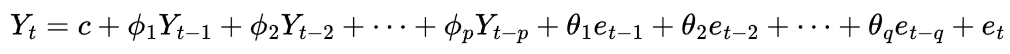

Donde:
- **Y_t** es la observación en el tiempo (t).
- **ϕ1,...,ϕp** son los parámetros autoregresivos.
- **θ1,...,θp** son los parámetros del promedio móvil.
- **e_t** es el error en el tiempo (t).


In [ ]:
# Configurar y entrenar el modelo ARIMA
arima_model = ARIMA(train_data, order=(1, 1, 1))
arima_results = arima_model.fit()

# Predecir en el conjunto de prueba
arima_forecast = arima_results.forecast(steps=12)
arima_predicted = pd.Series(arima_forecast, index=test_data.index)

# ARIMAX (AutoRegressive Integrated Moving Average with Exogenous Variables)

## Introducción

ARIMAX es una extensión del modelo ARIMA (AutoRegressive Integrated Moving Average) que incluye **variables exógenas** (también llamadas variables independientes o externas). Este modelo es útil cuando se tiene una serie temporal que depende no solo de sus propios valores pasados (como en ARIMA), sino también de otras variables que pueden influir en ella.

El modelo ARIMAX puede ser utilizado para realizar **pronósticos** de series temporales mientras se tienen en cuenta otras variables que pueden afectar la serie temporal en cuestión.

## Componentes del modelo ARIMAX

El modelo ARIMAX se define como:

$$
y_t = \alpha + \sum_{i=1}^{p} \phi_i y_{t-i} + \sum_{j=1}^{q} \theta_j \epsilon_{t-j} + \sum_{k=1}^{r} \beta_k x_{t-k} + \epsilon_t
$$

- **$y_t$**: Variable dependiente (serie temporal de interés).
- **$x_t$**: Variables exógenas (predictoras o independientes).
- **$p$**: Orden del componente autoregresivo (AR).
- **$q$**: Orden del componente de media móvil (MA).
- **$r$**: Número de variables exógenas.
- **$\phi_i$**: Coeficientes del modelo AR.
- **$\theta_j$**: Coeficientes del modelo MA.
- **$\beta_k$**: Coeficientes de las variables exógenas.
- **$\epsilon_t$**: Residuos del modelo.

### Parámetros del modelo ARIMAX
1. **p (AR)**: El número de términos autoregresivos. Este parámetro captura la relación entre el valor actual y sus valores pasados.
2. **d (I)**: El número de diferencias necesarias para hacer la serie temporal estacionaria. Esto se refiere a la parte integrada del modelo.
3. **q (MA)**: El número de términos de media móvil. Este parámetro modela la dependencia entre los residuos o errores de pronóstico.
4. **r (X)**: El número de variables exógenas que influyen en la serie temporal. Estas variables son consideradas predictores externos.

## Requisitos previos
- **Estacionariedad**: Al igual que el modelo ARIMA, el modelo ARIMAX requiere que la serie temporal sea estacionaria. Si no es estacionaria, deben aplicarse transformaciones como la diferenciación.
- **Variables exógenas**: Las variables exógenas deben ser seleccionadas con base en su relevancia para la serie temporal que estamos tratando de predecir.

## Aplicaciones del ARIMAX
El modelo ARIMAX es útil en varios contextos, como:

- **Pronóstico de ventas**: Utilizando factores como la publicidad, campañas de marketing, o precios.
- **Pronóstico financiero**: Considerando variables económicas externas como tasas de interés o el precio del petróleo.
- **Predicción de demanda**: Considerando factores externos que pueden afectar la demanda de productos, como el clima o eventos especiales.

## Ventajas del ARIMAX
- **Incorporación de factores externos**: A diferencia del modelo ARIMA, que solo utiliza los valores pasados de la serie temporal, ARIMAX permite que variables externas influyan en la predicción, lo que lo hace más flexible.
- **Mejora en las predicciones**: Cuando las variables exógenas son relevantes, este modelo puede mejorar significativamente las predicciones en comparación con ARIMA solo.

## Desventajas del ARIMAX
- **Complejidad**: La inclusión de variables exógenas agrega complejidad al modelo, lo que puede llevar a un mayor esfuerzo en la selección y preprocesamiento de las variables.
- **Dependencia de datos adicionales**: Requiere datos externos, lo cual puede no ser siempre factible o preciso.


In [ ]:
# Copiar los datos y ordenarlos por fecha
data_arimax = data.copy()


numeric_columns = data_arimax.select_dtypes(include=['number']).columns


data_arimax = data_arimax.groupby('Fecha')[numeric_columns].mean()

# Ordenar los datos por fecha
data_arimax = data_arimax.sort_values(by='Fecha')

# Dividir en datos de entrenamiento y prueba (últimos 12 datos como prueba)
train_data_arimax = data_arimax['Necesidad_Personal'][:-12]
test_data_arimax = data_arimax['Necesidad_Personal'][-12:]

# Seleccionar las variables exógenas
exog_vars = ['Proyectos_Activos', 'Rotacion_Empleados', 'Ausentismo', 'Horas_Extras', 'Clima_Laboral']

# Asegurar que las variables exógenas estén alineadas con el índice de train_data
train_exog = data_arimax[exog_vars].iloc[:-12]
test_exog = data_arimax[exog_vars].iloc[-12:]

# Alinear explícitamente los índices de train_data y train_exog
train_exog = train_exog.reindex(train_data_arimax.index)

# Ajustar el modelo ARIMAX (usando SARIMAX para tratar con exógenas)
arimax_model = SARIMAX(train_data_arimax, exog=train_exog, order=(1, 1, 1))
arimax_results = arimax_model.fit()

# Realizar la predicción para los próximos 12 pasos usando test_exog
arimax_forecast = arimax_results.forecast(steps=12, exog=test_exog)

# Crear un objeto pd.Series para las predicciones con los mismos índices que test_data
arimax_predicted = pd.Series(arimax_forecast, index=test_data_arimax.index)

### **Modelo 4: SARIMA**

**Modelo SARIMA (Seasonal ARIMA)**

El **modelo SARIMA** es una extensión del modelo ARIMA que incluye componentes estacionales. Es útil para modelar y predecir series temporales que tienen patrones estacionales además de tendencias. SARIMA es una combinación de:
- **ARIMA** (AutoRegressive Integrated Moving Average) para la parte no estacional.
- **Componente estacional** que permite modelar la estacionalidad en los datos.

### Componentes del Modelo SARIMA

El modelo **SARIMA** se especifica con los siguientes parámetros:
- **\(p\)**: El número de términos autoregresivos (AR) para la parte no estacional.
- **\(d\)**: El número de diferencias necesarias para hacer que la serie sea estacionaria.
- **\(q\)**: El número de términos de promedio móvil (MA) para la parte no estacional.
- **\(P\)**, **\(D\)**, **\(Q\)**: Los mismos parámetros para la parte estacional.
- **\(s\)**: La longitud del ciclo estacional, es decir, la cantidad de observaciones en un ciclo completo.

### Fórmula del SARIMA

La fórmula general para el modelo SARIMA es:

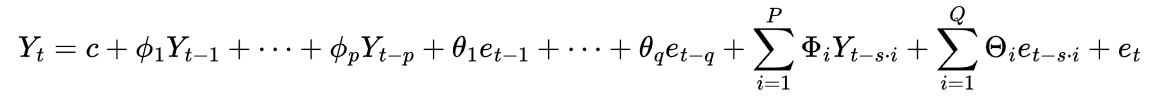


Donde:
- **Y_t** es la observación en el tiempo (t).
- **ϕ1,...,ϕp** son los parámetros autoregresivos.
- **θ1,...,θp** son los parámetros del promedio móvil.
- **Φ1,...,Φp** son los parámetros autoregresivos estacionales.
- **Θ1,...,Θp** son los parámetros del promedio móvil estacional.
- **e_t** es el error en el tiempo (t).

In [ ]:
# Configurar y entrenar el modelo SARIMA
sarima_model = SARIMAX(train_data, order=(1, 1, 1), seasonal_order=(1, 0, 0, 12))
sarima_results = sarima_model.fit(disp=False)

# Predecir en el conjunto de prueba
sarima_forecast = sarima_results.get_forecast(steps=12)
sarima_predicted = sarima_forecast.predicted_mean

#### **Modelo 4: Prophet**

Prophet es útil para series temporales con componentes de tendencia y estacionalidad. A diferencia de otros modelos de series temporales, Prophet es capaz de manejar los cambios en la estacionalidad, los valores atípicos y las fechas faltantes, lo que lo hace más robusto en aplicaciones reales. Además, Prophet es fácil de usar, flexible y escalable, lo que lo convierte en una excelente opción para tareas de forecasting.




In [ ]:
# Preparar los datos para Prophet
prophet_data = serie_temporal.reset_index()
prophet_data.columns = ['ds', 'y']

# Crear y entrenar el modelo Prophet
prophet_model = Prophet()
prophet_model.fit(prophet_data[:-12])

# Predecir en el conjunto de prueba
prophet_future = prophet_data[-12:]['ds']
prophet_forecast = prophet_model.predict(prophet_future.to_frame())
prophet_predicted = prophet_forecast['yhat'].values

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpr21iqega/cit8aayu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpr21iqega/fcorku1r.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=83458', 'data', 'file=/tmp/tmpr21iqega/cit8aayu.json', 'init=/tmp/tmpr21iqega/fcorku1r.json', 'output', 'file=/tmp/tmpr21iqega/prophet_modelc_mvs88a/prophet_model-20250103150745.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
15:07:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:07:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


#### **Interpretación del RMSE**
* Un RMSE bajo indica que el modelo es capaz de predecir valores cercanos a los valores reales, lo que refleja un mejor ajuste.
* Un RMSE alto sugiere que las predicciones del modelo están alejadas de los valores reales, lo que implica un ajuste deficiente.

#### **¿Cuándo un RMSE es bueno?**
El valor del RMSE debe interpretarse en el contexto del rango de los datos:

* Si los valores del RMSE son pequeños en comparación con el rango de la variable objetivo, el modelo puede considerarse preciso.
* Por ejemplo, si la serie tiene valores entre 1000 y 5000, un RMSE de 200 podría considerarse aceptable. En cambio, un RMSE de 2000 sería indicativo de un ajuste pobre.

### **Evaluación del Modelo**

#### **Métricas de Evaluación**

Para evaluar los modelos, se han utilizado las siguientes métricas:

1. **RMSE (Root Mean Squared Error)**:
   - Representa la raíz del error cuadrático medio entre los valores reales y predichos.
   - Valores más bajos indican un mejor desempeño del modelo.

2. **MAE (Mean Absolute Error)**:
   - Calcula el error absoluto promedio entre los valores reales y predichos.
   - Es menos sensible a valores atípicos en comparación con el RMSE.

3. **MAPE (Mean Absolute Percentage Error)**:
   - Mide el error absoluto promedio como un porcentaje de los valores reales.
   - Es útil para comparar errores relativos entre diferentes datasets.


In [ ]:
def evaluate_model(real, predicted):
    mae = mean_absolute_error(real, predicted)
    rmse = np.sqrt(mean_squared_error(real, predicted))
    mape = (np.abs((real - predicted) / real).mean())
    return {
        "MAE (Error Absoluto Medio)": mae,
        "RMSE (Raíz del Error Cuadrático Medio)": rmse,
        "MAPE (Error Porcentual Absoluto Medio)": mape
    }

In [ ]:
# Evaluar cada modelo
metricas_sma = evaluate_model(test_data, sma_forecast)
metricas_arimax = evaluate_model(test_data, arimax_predicted)
metricas_arima= evaluate_model(test_data, arima_predicted)
metricas_sarima = evaluate_model(test_data, sarima_predicted)
metricas_prophet = evaluate_model(test_data, prophet_predicted)


In [ ]:
# Mostrar resultados
print("Evaluación de Modelos")
print("\nSMA:", metricas_sma)
print("\nARIMA:", metricas_arima)
print("\nARIMAX:", metricas_arimax)
print("\nSARIMA:", metricas_sarima)
print("\nProphet:", metricas_prophet)

Evaluación de Modelos

SMA: {'MAE (Error Absoluto Medio)': 215.6666666666667, 'RMSE (Raíz del Error Cuadrático Medio)': 262.4556752700949, 'MAPE (Error Porcentual Absoluto Medio)': 0.11389854506115325}

ARIMA: {'MAE (Error Absoluto Medio)': 199.55244555812342, 'RMSE (Raíz del Error Cuadrático Medio)': 249.78370824183872, 'MAPE (Error Porcentual Absoluto Medio)': 0.10797454100028607}

ARIMAX: {'MAE (Error Absoluto Medio)': 1985.033032090955, 'RMSE (Raíz del Error Cuadrático Medio)': 1999.225693694538, 'MAPE (Error Porcentual Absoluto Medio)': nan}

SARIMA: {'MAE (Error Absoluto Medio)': 196.14705519530585, 'RMSE (Raíz del Error Cuadrático Medio)': 245.98588987882906, 'MAPE (Error Porcentual Absoluto Medio)': 0.10634847158529666}

Prophet: {'MAE (Error Absoluto Medio)': 260.9975627312861, 'RMSE (Raíz del Error Cuadrático Medio)': 344.030933155381, 'MAPE (Error Porcentual Absoluto Medio)': 0.14395415191400354}


#### **Visualización de resultados**

La elección del modelo SARIMA se debió a su capacidad para capturar tanto la tendencia como la estacionalidad en los datos, lo que resultó en una mejor precisión en las predicciones comparado con otros modelos.

Este gráfico muestra la comparación entre los datos originales de la serie temporal, las predicciones del modelo SARIMA y los datos de prueba. Se utiliza el modelo SARIMA debido a que ha mostrado una mejor puntuación en comparación con otros modelos, lo que lo convierte en la opción más precisa para esta serie temporal.

- **Datos Originales (azul):** Representan los valores reales de la serie temporal a lo largo del tiempo.
- **Predicción SARIMA (naranja, línea punteada):** Son las predicciones realizadas por el modelo SARIMA sobre los datos de prueba. Estas predicciones se han hecho utilizando el modelo ajustado, y su propósito es mostrar cómo el modelo se comporta al predecir valores futuros basándose en los datos históricos.
- **Datos de Prueba (verde):** Son los valores reales de las observaciones más recientes, que se utilizan para evaluar el desempeño del modelo.

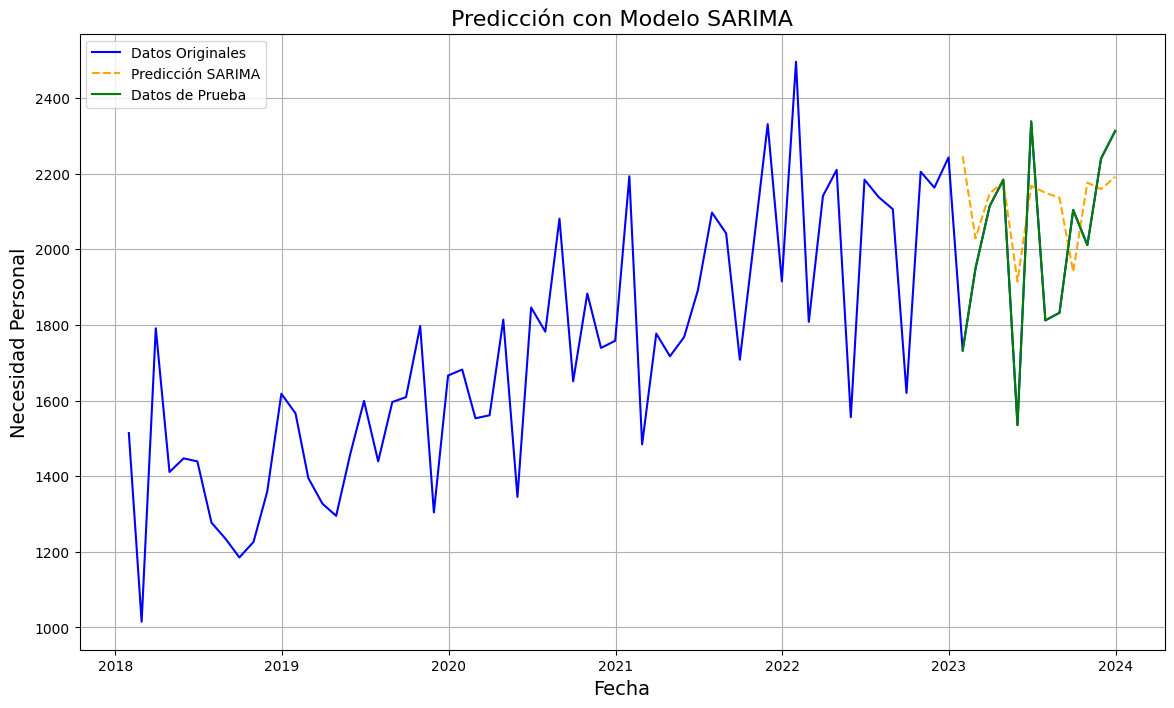

In [ ]:
plt.figure(figsize=(14, 8))

# Datos originales
plt.plot(serie_temporal, label="Datos Originales", color="blue")

# Predicciones de SARIMA
plt.plot(sarima_predicted, label="Predicción SARIMA", color="orange", linestyle="--")

# Mostrar conjunto de prueba
plt.plot(test_data, label="Datos de Prueba", color="green")

# Personalización del gráfico
plt.title("Predicción con Modelo SARIMA", fontsize=16)
plt.xlabel("Fecha", fontsize=14)
plt.ylabel("Necesidad Personal", fontsize=14)
plt.legend(loc="upper left")
plt.grid()
plt.show()


Este gráfico muestra una comparación entre los datos originales, las predicciones realizadas por SARIMA, y una predicción extendida de los próximos 3 meses.

- **Datos Originales (azul):** Son los valores reales de la serie temporal a lo largo del tiempo, que sirven como referencia para evaluar la precisión de las predicciones.

- **Predicción SARIMA (12 meses, naranja, línea punteada):** Son las predicciones realizadas por el modelo SARIMA sobre los datos de prueba, basándose en el comportamiento histórico de la serie temporal.

- **Predicción SARIMA (3 meses, roja, línea punteada):** Muestra las predicciones extendidas a los próximos 3 meses. Esta predicción se realiza utilizando el modelo SARIMA ajustado y se calcula para un horizonte temporal más allá de los datos de prueba. Las fechas para esta predicción se generan dinámicamente comenzando desde el mes siguiente al último valor en los datos de prueba.

- **Datos de Prueba (verde):** Representan los valores reales de las observaciones más recientes, que son utilizados para evaluar el desempeño del modelo.

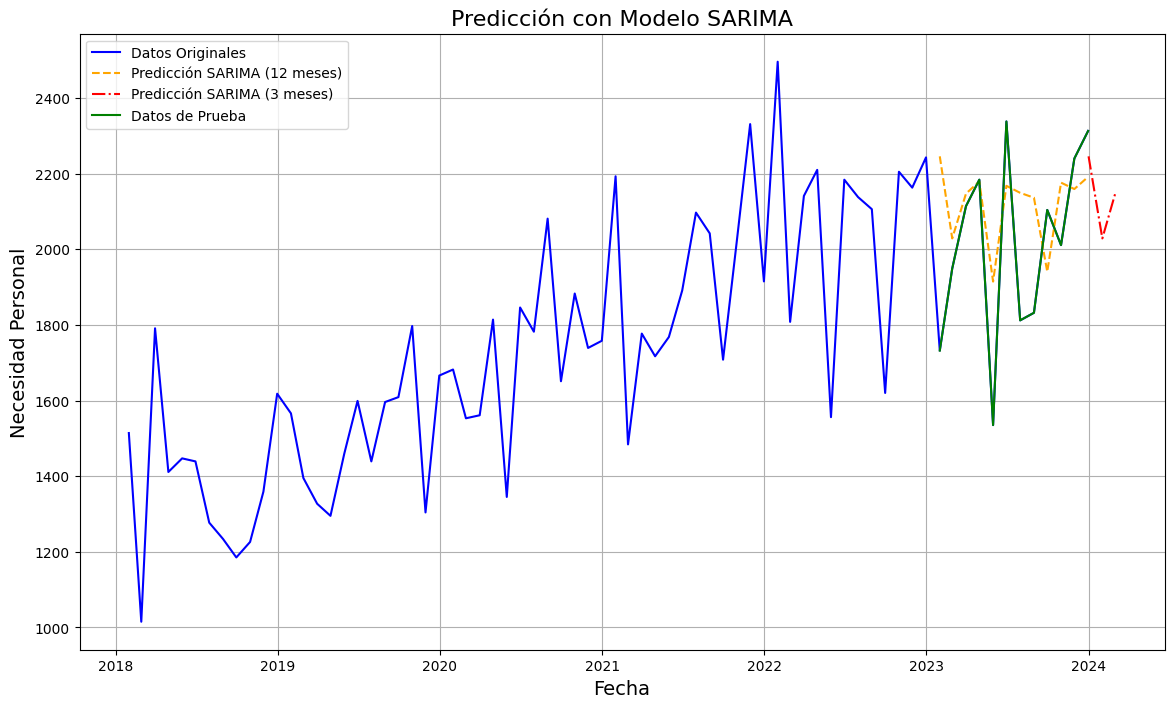

In [ ]:
plt.figure(figsize=(14, 8))

# Datos originales
plt.plot(serie_temporal, label="Datos Originales", color="blue")

# Predicciones de SARIMA (12 meses)
plt.plot(sarima_predicted, label="Predicción SARIMA (12 meses)", color="orange", linestyle="--")

# Predicción de los próximos 3 meses
sarima_next_3_months = sarima_results.forecast(steps=3)
sarima_next_3_index = pd.date_range(start=test_data.index[-1] + pd.offsets.MonthBegin(1), periods=3, freq='MS')
plt.plot(sarima_next_3_index, sarima_next_3_months, label="Predicción SARIMA (3 meses)", color="red", linestyle="-.")

# Mostrar conjunto de prueba
plt.plot(test_data, label="Datos de Prueba", color="green")

# Personalización del gráfico
plt.title("Predicción con Modelo SARIMA", fontsize=16)
plt.xlabel("Fecha", fontsize=14)
plt.ylabel("Necesidad Personal", fontsize=14)
plt.legend(loc="upper left")
plt.grid()
plt.show()
